In [42]:
from sklearn import model_selection
import seaborn as sns



## 4. Недообучение и переобучение. Утечка данных ##

![Скриншот](./img//Screenshot_41.png)


Важной характеристикой алгоритма машинного обучения является его обобщающая способность — способность использовать знания, полученные при обучении, на новых данных.

Обобщающая способность часто страдает из-за двух основных проблем машинного обучения: overfitting (переобучение) и underfitting (недообучение).

Переобучение (overfitting) — это проблема, при которой модель чувствительна к незначительным колебаниям в данных в процессе обучения. По сути, такая модель работает намного лучше с обучающими данными, чем с новыми. Она была чрезмерно натренирована на обнаружение уникальных характеристик обучающего набора данных, которые не являются общими закономерностями.

Недообучение (underfitting) — это проблема, при которой алгоритм недостаточно хорошо изучил данные и пропускает важные зависимости между признаками. В случае недообучения мы даже на обучающих данных не можем достичь приемлемых оценок для модели.

Недообучение и переобучение неразрывно связаны друг с другом: попытка бороться с одной проблемой может привести к возникновению другой, поэтому возникает дилемма смещения-разброса (bias-variance tradeoff). 

![Скриншот](./img//Screenshot_42.png)


![Скриншот](./img//Screenshot_44.png)


![Скриншот](./img//Screenshot_45.png)


![Скриншот](./img//Screenshot_46.png)


## КАК ОБНАРУЖИТЬ ПЕРЕОБУЧЕНИЕ ##

Переобучение легко детектируется с помощью изученных нами методов валидации: мы намеренно разбиваем выборку на тренировочную и валидационную (возможно, и тестовую) и смотрим на значения показателей на каждой из выборок, сравнивая их между собой.

Основные способы отследить переобучение:

![Скриншот](./img//Screenshot_47.png)


![Скриншот](./img//Screenshot_48.png)


In [43]:
import pandas as pd
from sklearn import metrics, model_selection, tree

water_data = pd.read_csv('./data/water_potability/water_potability.csv')
X, y = water_data.drop('Potability', axis=1), water_data['Potability']


X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
#Создаём модель
model_bad = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    class_weight='balanced', #веса классов
    random_state=42 #генератор случайных чисел
)
#Обучаем модель на тренировочной выборке
model_bad.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = model_bad.predict(X_train)
y_valid_pred = model_bad.predict(X_valid)
#Выводим значения метрик для тренировочной выборки
print('Train F1 score: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
#Выводим значения метрик для валидационной выборки
print('Valid F1 score: {:.2f}'.format(metrics.f1_score(y_valid, y_valid_pred)))

Train F1 score: 0.99
Valid F1 score: 0.47


![Скриншот](./img//Screenshot_49.png)


In [44]:
#Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
 
#Считаем метрики на кросс-валидации k-fold со стратификацией
cv_metrics = model_selection.cross_validate(
    estimator=model_bad, #модель
    X=X, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=skf, #кросс-валидатор
    scoring='f1', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
display(cv_metrics)

{'fit_time': array([0.04868412, 0.0458293 , 0.05591917, 0.05067754, 0.04942703]),
 'score_time': array([0.00200033, 0.00199962, 0.00250554, 0.00300026, 0.00300002]),
 'test_score': array([0.43512974, 0.44736842, 0.38113949, 0.40078585, 0.45508982]),
 'train_score': array([0.9970617 , 0.99609375, 0.99609375, 0.99509804, 0.99658036])}

![Скриншот](./img//Screenshot_50.png)


In [45]:
import numpy as np


print('Train k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['test_score'])))
## Train k-fold mean f1: 1.00
## Valid k-fold mean f1: 0.65

Train k-fold mean f1: 1.00
Valid k-fold mean f1: 0.42


![Скриншот](./img//Screenshot_51.png)


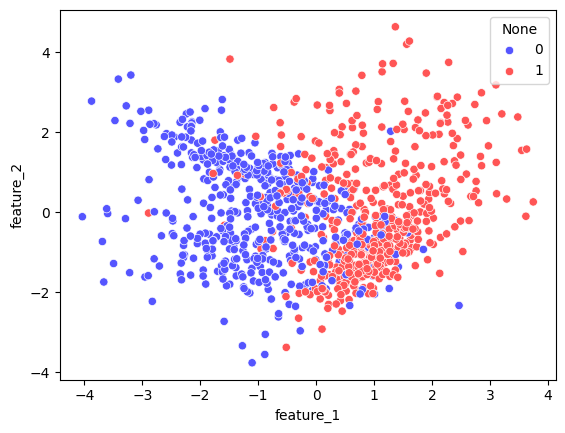

In [46]:
import seaborn as sns

from sklearn import datasets
X, y = datasets.make_classification(
    n_samples=1000, #количество объектов
    n_features=2, #количество признаков
    n_informative=2, #количество информативных признаков
    n_redundant=0, #количество неинформативных признаков
    n_classes=2, #количество классов
    n_clusters_per_class=2, #количество кластеров внутри класса
    random_state=1 #генератор случайных чисел
)
X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
y = pd.Series(y)
sns.scatterplot(x=X['feature_1'], y=X['feature_2'], hue=y, palette='seismic');

In [47]:
# X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X,y,stratify=y,test_size=0.3, random_state=42)
# Обучите модель дерева решений с глубиной 10 (остальные параметры оставьте по умолчанию) для решения задачи классификации на тренировочной выборке.
tree_model = tree.DecisionTreeClassifier(
  max_depth=10
)

tree_model.fit(X_train, y_train)

y_train_pred = tree_model.predict(X_train)
y_valid_pred = tree_model.predict(X_valid)

#Выводим значения метрик для тренировочной выборки
print('Train F1 score: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
#Выводим значения метрик для валидационной выборки
print('Valid F1 score: {:.2f}'.format(metrics.accuracy_score(y_valid, y_valid_pred)))


Train F1 score: 0.98
Valid F1 score: 0.81


## МЕТОДЫ БОРЬБЫ С ПЕРЕОБУЧЕНИЕМ ##



Мы посмотрели, как с помощью методов валидации можно определить наличие переобучения. Но как с ним бороться?

Существует несколько основных способов, и с каждым из них мы уже знакомились в нашем курсе. Ключевая идея, заложенная в каждом из методов, звучит так: снизить переобучение = уменьшить разброс (вариативность) ошибки модели:

## 1 Уменьшение сложности модели ##

![Скриншот](./img//Screenshot_52.png)


![Скриншот](./img//Screenshot_53.png)


Для случайного леса — «стрижка» деревьев (max_depth и min_samples_leaf) и уменьшение количества признаков, на которых обучается каждое дерево (max_features).

## 2 Регуляризация ## 

![Скриншот](./img//Screenshot_54.png)


![Скриншот](./img//Screenshot_55.png)


## 3 Манипуляции с данными ##

Ещё один верный способ побороть переобучение — увеличить или уменьшить количество примеров, на которых обучается модель.

![Скриншот](./img//Screenshot_56.png)


Также можно отбирать наиболее значимые признаки, которые в наибольшей степени влияют на предсказания модели.

О применении метода работы с данными мы поговорим в следующем модуле.

Сначала необходимо разобраться в причине переобучения модели. Для дерева решений установленный по умолчанию параметр max_depth будет означать, что дерево будет делиться до тех пор, пока не определит правильный класс для каждого объекта из обучающего набора данных.

На реальных данных, подверженных зашумлённости, такой подход в большинстве случаев приводит к переобучению дерева: глубина становится очень большой, и дерево не отражает общих зависимостей в данных.

В таком случае в первую очередь прибегают к «обрезке» деревьев путём ограничения максимальной глубины и/или увеличения количества объектов, при которых вершина дерева превращается в лист и деление прекращается.

Для начала посмотрим на текущую глубину дерева:



In [48]:
print('Current depth:', model_bad.get_depth())
## Current depth: 27

Current depth: 29


Дерево глубиной 27 — это очень сложная модель. Давайте попробуем её упростить, добавив в дерево решений ограничение на глубину (max_depth). Пусть максимальная глубина дерева будет равна 7.

In [49]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=4, #ограничиваем глубину дерева
    random_state=42, #генератор случайных чисел
    class_weight='balanced' #веса классов
)
 
#Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
 
#Считаем метрики на кросс-валидации k-fold со стратификацией
cv_metrics = model_selection.cross_validate(
    estimator=model, #модель
    X=X, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=skf, #кросс-валидатор
    scoring='f1', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
print('Train k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean f1: 0.88
Valid k-fold mean f1: 0.87


После ограничения максимальной глубины удалось уменьшить разницу между метриками на тренировочных и валидационных фолдах кросс-валидации.



Попробуем добавить ещё одно ограничение к нашему дереву: увеличим количество объектов, которых достаточно для образования листа дерева (min_samples_leaf). По умолчанию этот параметр равен 1. 

Напомним интерпретацию данного параметра. Пусть min_samples_leaf=5. Допустим, в результате разделения получается две вершины: первая — с четырьмя объектами, а вторая — с шестью. Тогда дерево разрешит снова делиться только второй вершине (6 > min_samples_leaf), а первая вершина (4 < min_samples_leaf) дерева превратится в лист, и её деление будет остановлено.

In [50]:
#Создаём модель
model = tree.DecisionTreeClassifier(
  criterion='entropy',max_depth=7, min_samples_leaf=5, random_state=42, class_weight='balanced'
)
#Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
#Считаем метрики на кросс-валидации k-fold со стратификацией
cv_metrics = model_selection.cross_validate(estimator=model, X=X,y=y,  cv=skf, scoring='f1', return_train_score=True)
print('Train k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['test_score'])))
## Train k-fold mean f1: 0.74
## Valid k-fold mean f1: 0.66

Train k-fold mean f1: 0.91
Valid k-fold mean f1: 0.85


Примечание. В приведённом выше примере мы выбирали параметры исключительно по принципу «холодно-горячо». Конечно же, в реальности никто так не делает — существуют специальные механизмы перебора комбинаций внешних параметров модели, и мы познакомимся с ними в отдельном модуле.

![Скриншот](./img//Screenshot_57.png)


Train k-fold mean f1: 0.87
Valid k-fold mean f1: 0.86


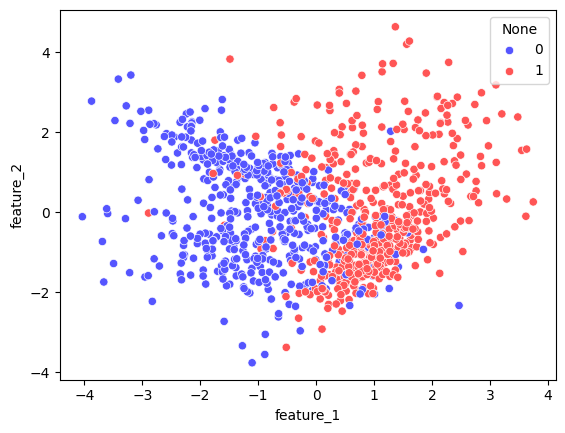

In [60]:
from sklearn import datasets
X, y = datasets.make_classification(
    n_samples=1000, #количество объектов
    n_features=2, #количество признаков
    n_informative=2, #количество информативных признаков
    n_redundant=0, #количество неинформативных признаков
    n_classes=2, #количество классов
    n_clusters_per_class=2, #количество кластеров внутри класса
    random_state=1 #генератор случайных чисел
)
X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
y = pd.Series(y)
sns.scatterplot(x=X['feature_1'], y=X['feature_2'], hue=y, palette='seismic');


# #Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', max_depth=3
)
# #Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
# #Считаем метрики на кросс-валидации k-fold со стратификацией
cv_metrics = model_selection.cross_validate(estimator=model, X=X, y=y, cv=skf, scoring='accuracy', return_train_score=True)
# cv_metrics = model_selection.cross_validate(estimator=model, X=X,y=y,  cv=skf, scoring='f1', return_train_score=True)
print('Train k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

## УТЕЧКА ДАННЫХ ##

Стоит упомянуть об ещё одной проблеме современного машинного обучения, которая называется утечкой данных. Данная проблема несколько похожа на проблему переобучения, но имеет другой характер.

Утечка данных (data leak) — это ситуация, в которой данные, используемые для обучения модели, содержат прямую или косвенную информацию о целевой переменной.

![Скриншот](./img//Screenshot_58.png)


![Скриншот](./img//Screenshot_59.png)


Из-за утечки данных прогноз модели становится очень оптимистичным. Вы получаете потрясающее качество во время обучения модели, радуетесь сами и радуете своего заказчика. Однако когда дело доходит до использования модели в реальных условиях, оказывается, что у вас недостаточно данных для построения прогноза.

![Скриншот](./img//Screenshot_60.png)
